In [1]:
import pandas as pd
import xarray as xr
import rasterio as rio
import numpy as np
import rioxarray
from glob import glob
import geopandas as gpd

In [2]:
md_df = pd.read_csv('md_processing_decisions.csv').iloc[:, 0:9]
md_df['survey_name'] = md_df['survey_name'].str.strip()

In [9]:
md_area_dic = {}
ice_extent_dic = {}
for i, row in md_df.iterrows():
    print(row.survey_name)
    md_gdf = gpd.read_file(f'/home/jovyan/repos/incubator_moraine_dam_analysis/mapping/polygons/{row.survey_name}_md.shp')
    md_area_dic[f'{row.survey_name}'] = md_gdf.area.item()
    ice_ds = xr.open_dataset(f'/home/jovyan/repos/incubator_moraine_dam_analysis/dams/{row.survey_name}/{row.survey_name.strip()}_ice_map.tif').squeeze()
    ice_extent_dic[f'{row.survey_name.strip()}'] = ice_ds.rio.clip(md_gdf.geometry, crs=md_gdf.crs).band_data.sum().item()*400

rolpa
barun
imja
lumding
chamlang_south
thugali
nagma
chamlang_north
muli_tal
barun_pokhari
east_hongu_1
birendra
mera
upper_barun
gakal_gl_0008
kotam_gl_0111
east_hongu_2
tallo_kekyap
kekyap
dig
sabai
kodud_gl_0205
hongu_1


In [10]:
md_df['area'] = md_df['survey_name'].map(md_area_dic)
md_df['ice_area'] = md_df['survey_name'].map(ice_extent_dic)

In [11]:
md_df['ice_proportion'] = md_df['ice_area']/md_df['area']

<Axes: >

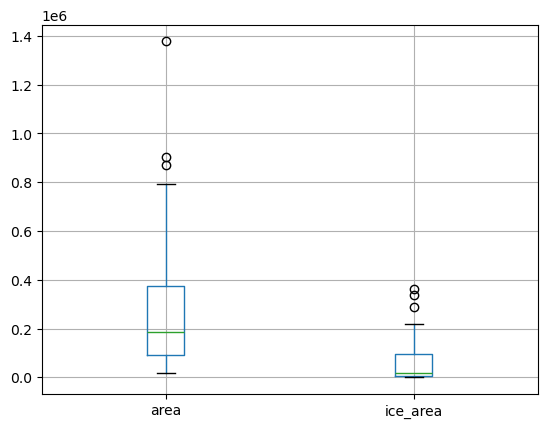

In [20]:
md_df.boxplot(column = ['area', 'ice_area'])

<Axes: >

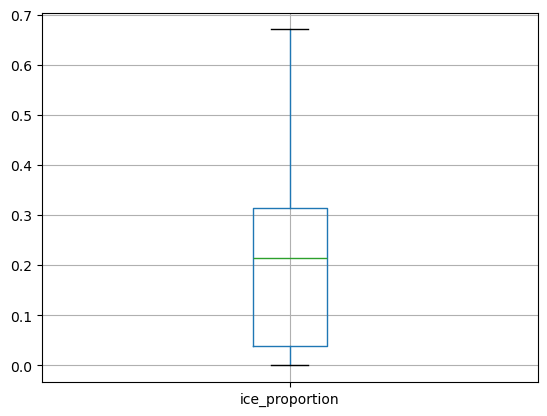

In [18]:
md_df.boxplot(column = 'ice_proportion')